<a href="https://colab.research.google.com/github/tinserrano/Redes-Neuronales/blob/main/Trabajo_Integrador_MNIST_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Realización de Encoder + Autoencoder Convolucional**

In [ ]:
from keras.datasets import mnist
from keras import models, layers, optimizers
from keras.layers import Flatten, Dropout, Dense
from keras.utils import to_categorical
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#train_images.shape
#train_images[3]

In [ ]:
# Normalizo los valores de los píxeles entre 0 y 1
train_images = train_images.reshape((60000, 28, 28,1))
test_images = test_images.reshape((10000, 28, 28,1))
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape
#train_images[3]

(60000, 28, 28, 1)

In [ ]:
train_image = input

In [ ]:
model = models.Sequential()

#ENCODER
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))


#DECODER
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding="same"))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding="same"))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding="same"))

#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))

#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [ ]:
encdec = model.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
469/469 [==============================] - 36s 7ms/step - loss: 0.2875 - accuracy: 0.7993 - val_loss: 0.1509 - val_accuracy: 0.8024
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1452 - accuracy: 0.8026 - val_loss: 0.1312 - val_accuracy: 0.8035
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1296 - accuracy: 0.8061 - val_loss: 0.1220 - val_accuracy: 0.8063
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1222 - accuracy: 0.8077 - val_loss: 0.1176 - val_accuracy: 0.8068
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1174 - accuracy: 0.8089 - val_loss: 0.1140 - val_accuracy: 0.8086
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1144 - accuracy: 0.8098 - val_loss: 0.1112 - val_accuracy: 0.8095
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1118 - accuracy: 0.8101 - val_loss: 0.1090 - val_accuracy: 0.8093
Epoch

In [ ]:
model.save("encoder.h5")

In [ ]:
encdec.history

{'accuracy': [0.7973224520683289,
  0.8038697242736816,
  0.8067253232002258,
  0.8080445528030396,
  0.8089673519134521,
  0.8096481561660767,
  0.8101409077644348,
  0.8105158805847168,
  0.810815155506134,
  0.8110455870628357,
  0.8112391233444214,
  0.8114079833030701,
  0.8115687966346741,
  0.811697781085968,
  0.8118276596069336,
  0.8119428753852844,
  0.8120467662811279,
  0.8121424317359924,
  0.8122338652610779,
  0.8123102188110352],
 'loss': [0.20522911846637726,
  0.1402871459722519,
  0.12707029283046722,
  0.12083206325769424,
  0.1168108657002449,
  0.11371424794197083,
  0.1113482415676117,
  0.10945934802293777,
  0.10787227004766464,
  0.10658752173185349,
  0.10550521314144135,
  0.10456803441047668,
  0.10365982353687286,
  0.10289810597896576,
  0.10218679904937744,
  0.10157353430986404,
  0.1009565219283104,
  0.10039443522691727,
  0.09989962726831436,
  0.09943787753582001],
 'val_accuracy': [0.8024411797523499,
  0.8035389184951782,
  0.8063223361968994,
  

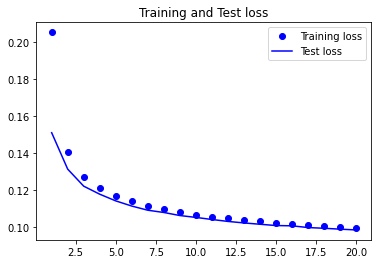

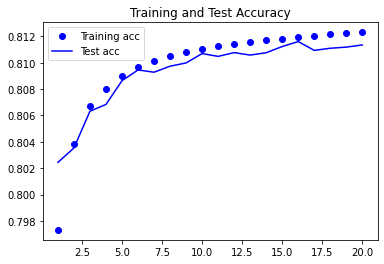

In [ ]:

encdecloss = encdec.history["loss"]
encdecval_loss = encdec.history["val_loss"]
encdecacc = encdec.history["accuracy"]
encdecval_acc = encdec.history["val_accuracy"]

import matplotlib.pyplot as plt

epochs = range(1, len(encdecloss) + 1)

plt.plot(epochs, encdecloss, "bo", label = "Training loss")
plt.plot(epochs, encdecval_loss, "b", label = "Test loss")
plt.title("Training and Test loss")
plt.legend()
plt.show()

plt.plot(epochs, encdecacc, "bo", label = "Training acc")
plt.plot(epochs, encdecval_acc, "b", label = "Test acc")
plt.title("Training and Test Accuracy")
plt.legend()
plt.show()



In [ ]:
len(encdec.history["accuracy"])

20

In [ ]:
import matplotlib.pyplot as plt

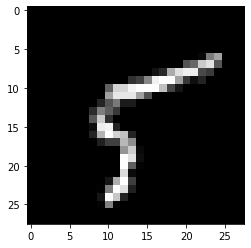

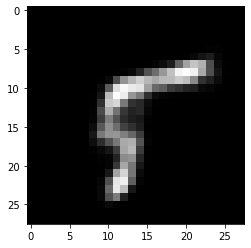

In [ ]:
plt.figure(figsize=(20, 4))
plt.imshow(x_test[59].reshape(28, 28))
plt.gray()
#get_xaxis().set_visible(False)
#get_yaxis().set_visible(False)


decoded_imgs = model.predict(x_test)
plt.figure(figsize=(20,4))
plt.imshow(model.predict(x_test)[59].reshape(28,28))
plt.gray()
#get_xaxis().set_visible(False)
#get_yaxis().set_visible(False)

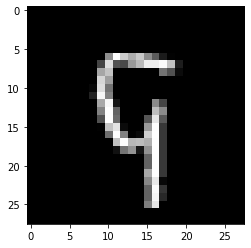

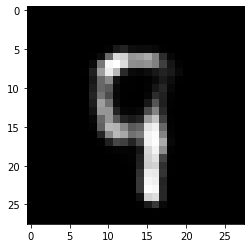

In [ ]:
plt.figure(figsize=(20, 4))
plt.imshow(x_test[62].reshape(28, 28))
plt.gray()
#get_xaxis().set_visible(False)
#get_yaxis().set_visible(False)


decoded_imgs = model.predict(x_test)
plt.figure(figsize=(20,4))
plt.imshow(model.predict(x_test)[62].reshape(28,28))
plt.gray()
#get_xaxis().set_visible(False)
#get_yaxis().set_visible(False)

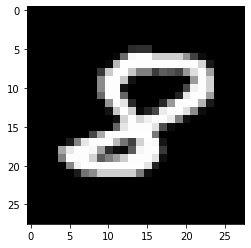

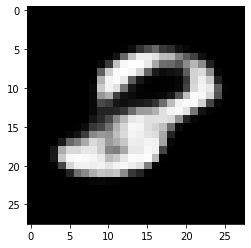

In [ ]:
plt.figure(figsize=(20, 4))
plt.imshow(x_test[61].reshape(28, 28))
plt.gray()
#get_xaxis().set_visible(False)
#get_yaxis().set_visible(False)


decoded_imgs = model.predict(x_test)
plt.figure(figsize=(20,4))
plt.imshow(model.predict(x_test)[61].reshape(28,28))
plt.gray()
#get_xaxis().set_visible(False)
#get_yaxis().set_visible(False)


In [ ]:
#test_loss, test_acc = model.evaluate(test_images, test_labels)